In [30]:
!pip install umap-learn
!pip install -U -q PyDrive2
!pip install matplotlib-dashboard
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import LabelEncoder
from sklearn import manifold
from sklearn.manifold import TSNE
from sklearn.manifold import Isomap
import kagglehub
import umap
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import functools
from matplotlib_dashboard import MatplotlibDashboard

In [18]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
fileDownloaded = drive.CreateFile({'id':'1EzPqmWGhFQC5W4AGIxrL6wTe1LkDuQci'})
fileDownloaded.GetContentFile('example.csv')
ref = pd.read_csv('example.csv', index_col='ID', sep =',')
ref.head()

<ipython-input-18-417be81e61dc>:7: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  ref = pd.read_csv('example.csv', index_col='ID', sep =',')


,GB_ACC,SPOT_ID,Species Scientific Name,Annotation Date,Sequence Type,Sequence Source,Target Description,Representative Public ID,Gene Title,Gene Symbol,ENTREZ_GENE_ID,RefSeq Transcript ID,Gene Ontology Biological Process,Gene Ontology Cellular Component,Gene Ontology Molecular Function
ID,,,,,,,,,,,,,,,
1007_s_at,U48705,NaN,Homo sapiens,10/6/2014,Exemplar sequence,Affymetrix Proprietary Database,U48705 /FEATURE=mRNA /DEFINITION=HSU48705 Huma...,U48705,discoidin domain receptor tyrosine kinase 1 //...,DDR1 /// MIR4640,780 /// 100616237,NM_001202521 /// NM_001202522 /// NM_001202523...,0001558 // regulation of cell growth // inferr...,0005576 // extracellular region // inferred fr...,0000166 // nucleotide binding // inferred from...
1053_at,M87338,NaN,Homo sapiens,10/6/2014,Exemplar sequence,GenBank,M87338 /FEATURE= /DEFINITION=HUMA1SBU Human re...,M87338,"replication factor C (activator 1) 2, 40kDa",RFC2,5982,NM_001278791 /// NM_001278792 /// NM_001278793...,0000278 // mitotic cell cycle // traceable aut...,0005634 // nucleus // inferred from electronic...,0000166 // nucleotide binding // inferred from...
117_at,X51757,NaN,Homo sapiens,10/6/2014,Exemplar sequence,Affymetrix Proprietary Database,X51757 /FEATURE=cds /DEFINITION=HSP70B Human h...,X51757,heat shock 70kDa protein 6 (HSP70B'),HSPA6,3310,NM_002155,0000902 // cell morphogenesis // inferred from...,0005737 // cytoplasm // inferred from direct a...,0000166 // nucleotide binding // inferred from...
121_at,X69699,NaN,Homo sapiens,10/6/2014,Exemplar sequence,GenBank,X69699 /FEATURE= /DEFINITION=HSPAX8A H.sapiens...,X69699,paired box 8,PAX8,7849,NM_003466 /// NM_013951 /// NM_013952 /// NM_0...,0001655 // urogenital system development // in...,0005634 // nucleus // inferred from direct ass...,0000979 // RNA polymerase II core promoter seq...
1255_g_at,L36861,NaN,Homo sapiens,10/6/2014,Exemplar sequence,Affymetrix Proprietary Database,L36861 /FEATURE=expanded_cds /DEFINITION=HUMGC...,L36861,guanylate cyclase activator 1A (retina),GUCA1A,2978,NM_000409 /// XM_006715073,0007165 // signal transduction // non-traceabl...,0001750 // photoreceptor outer segment // infe...,0005509 // calcium ion binding // inferred fro...


In [19]:
# Download latest version
path = kagglehub.dataset_download("brunogrisci/breast-cancer-gene-expression-cumida")
print("Path to dataset files:", path)
data = pd.read_csv('/root/.cache/kagglehub/datasets/brunogrisci/breast-cancer-gene-expression-cumida/versions/2/Breast_GSE45827.csv')
data.head()

Path to dataset files: /root/.cache/kagglehub/datasets/brunogrisci/breast-cancer-gene-expression-cumida/versions/2


,samples,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,84,basal,9.850040,8.097927,6.424728,7.353027,3.029122,6.880079,4.963740,4.408328,...,12.229711,11.852955,13.658701,13.477698,6.265781,5.016196,4.901594,2.966657,3.508495,3.301999
1,85,basal,9.861357,8.212222,7.062593,7.685578,3.149468,7.542283,5.129607,4.584418,...,12.178531,11.809408,13.750086,13.470146,6.771853,5.291005,5.405839,2.934763,3.687666,3.064299
2,87,basal,10.103478,8.936137,5.735970,7.687822,3.125931,6.562369,4.813449,4.425195,...,12.125108,11.725766,13.621732,13.295080,6.346952,5.171403,5.184286,2.847684,3.550597,3.158535
3,90,basal,9.756875,7.357148,6.479183,6.986624,3.181638,7.802344,5.490982,4.567956,...,12.111235,11.719215,13.743108,13.508861,6.610284,5.193356,5.086569,3.031602,3.524981,3.272665
4,91,basal,9.408330,7.746404,6.693980,7.333426,3.169923,7.610457,5.372469,4.424426,...,12.173642,11.861296,13.797774,13.542206,6.414354,5.040202,5.235318,2.956232,3.445501,3.193947


In [20]:
X = data.iloc[:,2:].to_numpy()
y = data.iloc[:,1].to_numpy()

labels = np.unique(y)
data.groupby(['type'])['type'].count()

,type
type,
HER,30
basal,41
cell_line,14
luminal_A,29
luminal_B,30
normal,7


In [50]:
dimension_reducers = {
    'PCA': (PCA),
    'KernelPCA': (functools.partial(KernelPCA, kernel='rbf')),
    'TSNE': (TSNE),
    'Isomap': (Isomap),
    'Specteral': (manifold.SpectralEmbedding),
    'UMAP' : (umap.UMAP)
}

def plot_dimention_reduction(method, X, y, labels, ax, title):
  comps = method(n_components=2).fit_transform(X)

  for i, label in enumerate(labels):
    ax.scatter(
      comps[y==label, 0],
      comps[y==label, 1],
      label=label,
      alpha=.4,
    )

  ax.legend(title="Labels")
  ax.set_xlabel('Component 1')
  ax.set_ylabel('Component 2')
  ax.set_title(title)

 50%|█████     | 3/6 [00:03<00:03,  1.27s/it]/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
100%|██████████| 6/6 [00:07<00:00,  1.31s/it]


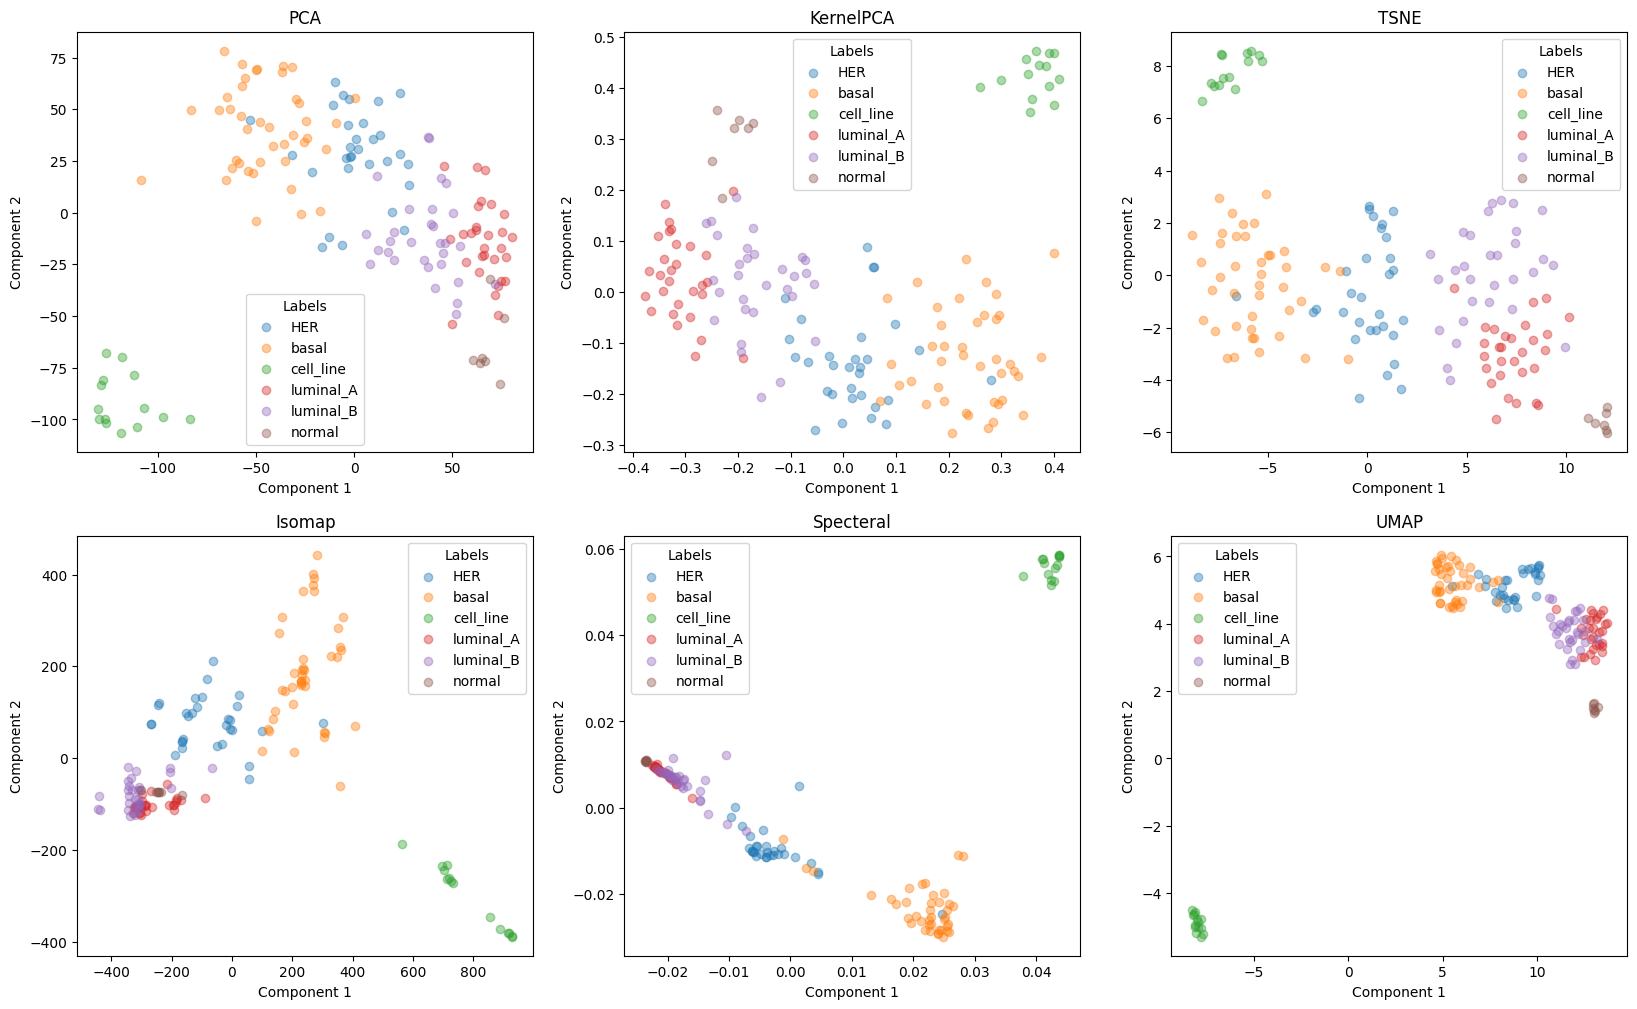

In [51]:
slots = list(dimension_reducers.keys())
slots += [None]*(3-len(dimension_reducers)%3 if len(dimension_reducers)%3 else 0)
slots = np.array(slots).reshape(-1, 3).tolist()
plt.figure(figsize=(20, 6*len(slots)))
dashboard = MatplotlibDashboard(slots)
for dr in tqdm(dimension_reducers):
  plot_dimention_reduction(dimension_reducers[dr], X, y, labels, dashboard[dr], dr)
plt.show()

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score, classification_report, roc_curve, auc
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

In [54]:
#### train/ test splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

print('feature shape:', X.shape)
print('target shape:', y.shape)

print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_Train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

feature shape: (151, 54675)
target shape: (151,)
X_train shape: (120, 54675)
X_test shape: (31, 54675)
y_Train shape: (120,)
y_test shape: (31,)


In [55]:
##### scale data:
scaler = StandardScaler()
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [56]:
### function to evaluate the model:
def EvaluateModel(model, X_train, X_test, y_train, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Display the confusion matrices
    plt.figure(figsize=(4,2)) # Sets the size of the whole figure, including both subplots
    plt.subplot(121) # Left subplot (1 = rows of figure, 2 = columns of figure, 1 = position of this subplot)
    cm_train = confusion_matrix(y_train, y_train_pred)
    sns.heatmap(cm_train, annot=True)
    plt.title('Training set')
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.subplot(122) # Right subplot (1 = rows of figure, 2 = columns of figure, 2 = position of this subplot)
    cm_test = confusion_matrix(y_test, y_test_pred)
    sns.heatmap(cm_test, annot=True)
    plt.title('Test set')
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.tight_layout() # Adds spacing between the subplots so they don't overlap
    plt.show()

    print('Classification report for training set:')
    print(classification_report(y_train, y_train_pred, zero_division=0.0))
    print('Classfication report for test set:')
    print(classification_report(y_test, y_test_pred, zero_division=0.0))

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


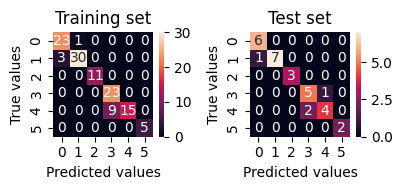

Classification report for training set:
              precision    recall  f1-score   support

         HER       0.88      0.96      0.92        24
       basal       0.97      0.91      0.94        33
   cell_line       1.00      1.00      1.00        11
   luminal_A       0.72      1.00      0.84        23
   luminal_B       1.00      0.62      0.77        24
      normal       1.00      1.00      1.00         5

    accuracy                           0.89       120
   macro avg       0.93      0.92      0.91       120
weighted avg       0.91      0.89      0.89       120

Classfication report for test set:
              precision    recall  f1-score   support

         HER       0.86      1.00      0.92         6
       basal       1.00      0.88      0.93         8
   cell_line       1.00      1.00      1.00         3
   luminal_A       0.71      0.83      0.77         6
   luminal_B       0.80      0.67      0.73         6
      normal       1.00      1.00      1.00         2

  

In [57]:
#### knn model:
knn = KNeighborsClassifier()
parameters = {'n_neighbors': np.linspace(1,20,20).astype(int)}

grid = GridSearchCV(knn,
                    parameters,
                    cv = 5)
grid.fit(X_train, y_train)
best_knn = grid.best_estimator_

EvaluateModel(best_knn, X_train, X_test, y_train, y_test)

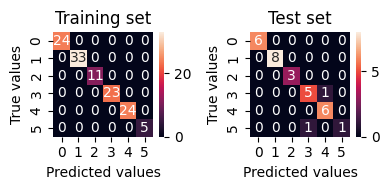

Classification report for training set:
              precision    recall  f1-score   support

         HER       1.00      1.00      1.00        24
       basal       1.00      1.00      1.00        33
   cell_line       1.00      1.00      1.00        11
   luminal_A       1.00      1.00      1.00        23
   luminal_B       1.00      1.00      1.00        24
      normal       1.00      1.00      1.00         5

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120

Classfication report for test set:
              precision    recall  f1-score   support

         HER       1.00      1.00      1.00         6
       basal       1.00      1.00      1.00         8
   cell_line       1.00      1.00      1.00         3
   luminal_A       0.83      0.83      0.83         6
   luminal_B       0.86      1.00      0.92         6
      normal       1.00      0.50      0.67         2

  

In [58]:
##Random Forest model:
rf = RandomForestClassifier()
parameters = {'n_estimators': np.linspace(10,100,90).astype(int)}

grid = GridSearchCV(rf,
                    parameters,
                    cv = 5)
grid.fit(X_train, y_train)
best_rf = grid.best_estimator_

EvaluateModel(best_rf, X_train, X_test, y_train, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


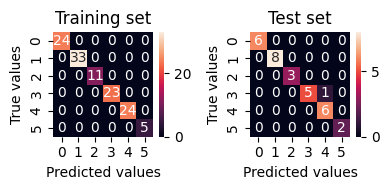

Classification report for training set:
              precision    recall  f1-score   support

         HER       1.00      1.00      1.00        24
       basal       1.00      1.00      1.00        33
   cell_line       1.00      1.00      1.00        11
   luminal_A       1.00      1.00      1.00        23
   luminal_B       1.00      1.00      1.00        24
      normal       1.00      1.00      1.00         5

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120

Classfication report for test set:
              precision    recall  f1-score   support

         HER       1.00      1.00      1.00         6
       basal       1.00      1.00      1.00         8
   cell_line       1.00      1.00      1.00         3
   luminal_A       1.00      0.83      0.91         6
   luminal_B       0.86      1.00      0.92         6
      normal       1.00      1.00      1.00         2

  

In [59]:
#Logistic Regression model:
log_reg = LogisticRegression(multi_class="multinomial",
                             max_iter = 1000)

#parameters = {'max_iter': np.linspace(100,10000).astype(int)}
#grid = GridSearchCV(log_reg, parameters, cv = 5)
log_reg.fit(X_train, y_train)

#best_log_reg = grid.best_estimator_
EvaluateModel(log_reg, X_train, X_test, y_train, y_test)

In [61]:
#Feature selection
selector = SelectFromModel(log_reg, max_features= 10)

X_selected = selector.fit_transform(X_train , y_train)

ind = selector.get_support(indices=True)
print('Selected {} features: '.format(ind.size),)
for i in range(ind.size):
  print(ref.iloc[ind[i],9])

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Selected 10 features: 
STARD3
ESR1
GRB7
ERBB2
ERBB2
PGAP3
MIEN1
AGR3
ERBB2
PGAP3
